In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../pandas basic/pandas_datafiles/seoul_weather.csv', encoding='cp949', skiprows=11)
df.head(2)

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각
0,108,서울,1907-10-01,13.5,20.7,NaN,7.9,NaN
1,108,서울,1907-10-02,16.2,22.0,NaN,7.9,NaN


In [12]:
df.columns

Index(['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)',
       '최저기온시각'],
      dtype='object')

In [14]:
df = df.drop(['\t\t지점번호', '지점명', '\t최고기온시각','최저기온시각'], axis = 1)

In [15]:
df.columns = ['일시','평온','고온','저온']
df.head()

,일시,평온,고온,저온
0,1907-10-01,13.5,20.7,7.9
1,1907-10-02,16.2,22.0,7.9
2,1907-10-03,16.2,21.3,13.1
3,1907-10-04,16.5,22.0,11.2
4,1907-10-05,17.6,25.4,10.9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40488 entries, 0 to 40487
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      40488 non-null  object 
 1   평온      39732 non-null  float64
 2   고온      39730 non-null  float64
 3   저온      39731 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.2+ MB


In [20]:
# date Type를 날짜형식으로 변경 ( object => datetime64)
df['일시'] = pd.to_datetime(df['일시'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40488 entries, 0 to 40487
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      40488 non-null  datetime64[ns]
 1   평온      39732 non-null  float64       
 2   고온      39730 non-null  float64       
 3   저온      39731 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.2 MB


In [26]:
# 날짜형식의 매서드 사용 가능
# 날짜연산도 가능
df['일시'].dt.year

0        1907
1        1907
2        1907
3        1907
4        1907
         ... 
40483    2019
40484    2019
40485    2019
40486    2019
40487    2019
Name: 일시, Length: 40488, dtype: int64

In [27]:
# 8월의 최고기온을 추출해서 라인그래프

<AxesSubplot:>

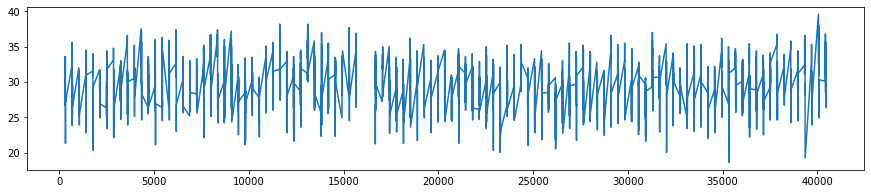

In [39]:

plt.figure(figsize=(15,3))

# plt.plot(df[df['일시'].dt.month == 8]['고온'])
df.loc[df['일시'].dt.month == 8]['고온'].plot()

<AxesSubplot:ylabel='Frequency'>

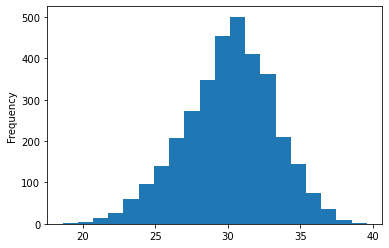

In [41]:
df.loc[df['일시'].dt.month == 8]['고온'].plot(kind='hist', bins=20)

In [42]:
# 매년 8월 중의 최고기온 하나를 추출해서 line chart

<AxesSubplot:xlabel='일시'>

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


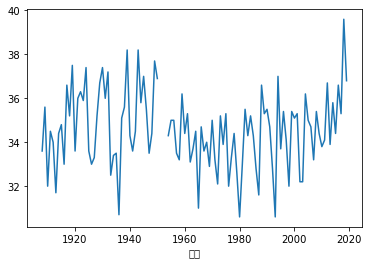

In [89]:
df.groupby([df['일시'].dt.year,df['일시'].dt.month])['고온'].max().unstack().loc[:,8].plot()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_2000/3931096637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon8_df['year'] = mon8_df['일시'].dt.year


<AxesSubplot:xlabel='year'>

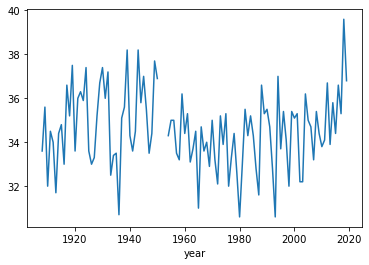

In [88]:
# 강사님
mon8_df = df.loc[df['일시'].dt.month==8]
mon8_df['year'] = mon8_df['일시'].dt.year
mon8_df.groupby('year')['고온'].max().plot()

In [90]:
# 지구온난화 여부 확인을 위해 매년 연평균기온의 line chart

<AxesSubplot:xlabel='일시'>

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


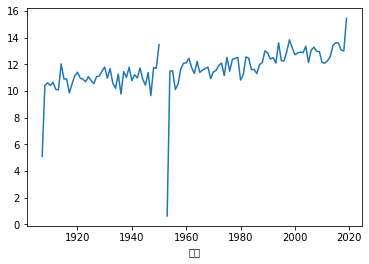

In [98]:
df.groupby(df['일시'].dt.year)['평온'].mean().plot()

<AxesSubplot:xlabel='year'>

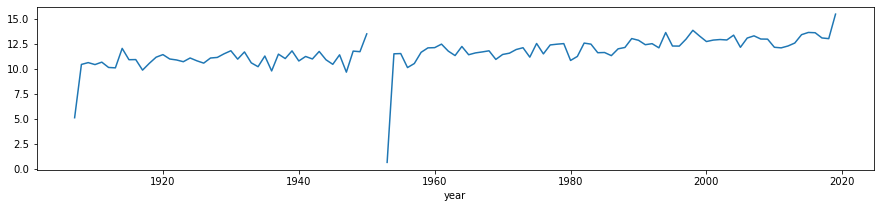

In [100]:
# 강사님
plt.figure(figsize=(15,3))

df['year'] = df.일시.dt.year
df.groupby('year')['평온'].mean().plot()

In [101]:
# 1 ~ 12월 각매월의 일평균기온의 box chart

<AxesSubplot:>

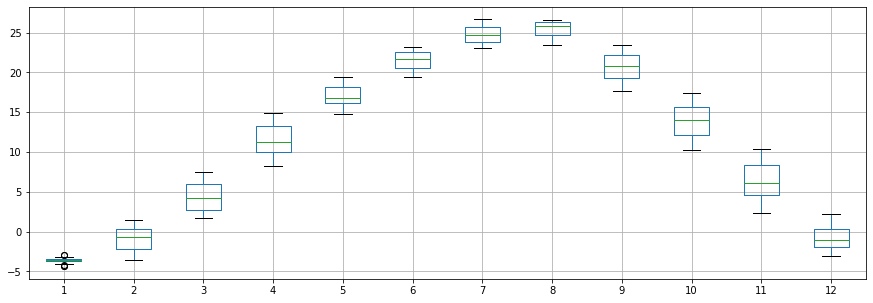

In [178]:
plt.figure(figsize=(15,5))

df.groupby([df['일시'].dt.day,df['일시'].dt.month])['평온'].mean().unstack().boxplot()

In [132]:
df.groupby([df['일시'].dt.month,df['일시'].dt.day])['평온'].mean().unstack()

일시,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
일시,,,,,,,,,,,,,,,,,,,,,
1,-3.000917,-3.577982,-3.583486,-3.968807,-4.149541,-3.619266,-3.588991,-3.431193,-3.177064,-3.416514,...,-3.689908,-4.379817,-4.094495,-3.722936,-3.567890,-3.420183,-3.193578,-2.920183,-3.561468,-3.482569
2,-3.422936,-3.545872,-3.126606,-2.656881,-2.167890,-2.269725,-2.410092,-2.447706,-2.182569,-2.163303,...,0.568807,0.373394,0.594495,0.890826,1.143119,1.252294,1.485321,1.222222,NaN,NaN
3,1.751376,1.710092,2.129358,2.549541,2.468807,2.054128,2.009174,2.488991,3.011927,2.946789,...,5.950459,5.937615,5.438532,5.275229,5.916514,6.451376,6.999083,7.317431,7.325688,7.468807
4,8.241284,8.373394,8.569725,8.979817,9.112844,9.045872,9.350459,9.916514,10.175229,10.150459,...,12.970642,13.400000,13.427523,13.407339,13.425688,13.479817,13.724771,14.429358,14.885321,NaN
5,15.080734,14.759633,14.851376,15.052294,15.393578,15.357798,15.784404,16.178899,16.422936,16.407339,...,17.830275,18.276147,18.371560,18.188073,18.504587,18.759633,18.984404,19.375229,19.466055,19.366055
6,19.552294,19.549541,19.477982,19.855046,19.995413,20.338532,20.422936,20.483486,20.787156,20.733028,...,22.545872,22.627523,22.716514,22.733028,22.545872,22.608257,22.961468,23.071560,23.180734,NaN
7,23.032110,23.171560,23.305505,23.313761,23.503670,23.799083,23.695413,23.637615,23.852294,23.922018,...,25.506422,25.666055,25.784404,25.848624,25.988991,26.161468,26.176147,26.230275,26.420183,26.669725
8,26.607339,26.562385,26.442202,26.218349,26.437615,26.429358,26.241284,26.358716,26.635780,26.369725,...,25.231193,24.923853,24.557798,24.446789,24.465138,24.180734,24.120183,23.890826,23.694495,23.492661
9,23.437037,23.153704,23.077778,22.821296,22.512037,22.590741,22.501852,22.305556,21.775000,21.722222,...,19.304630,19.346296,19.162037,18.850000,18.506481,18.325000,18.054630,17.862963,17.673148,NaN


In [136]:
# 강사님
weather_list = []
for i in range(1,13):
    weather_list.append([k for j, k in zip(df['일시'], df['평온'])if j.month == i])
weather_list

[[-5.9,
  -7.7,
  -6.2,
  -7.5,
  -4.8,
  -1.1,
  -4.4,
  -6.3,
  -3.2,
  0.3,
  1.7,
  2.0,
  1.4,
  -3.2,
  -1.9,
  -8.9,
  -6.5,
  1.1,
  1.7,
  -1.1,
  -9.1,
  -9.7,
  -7.1,
  -2.0,
  -1.2,
  -4.1,
  -4.4,
  -6.1,
  -3.5,
  -1.1,
  1.4,
  -7.4,
  -0.9,
  2.4,
  2.4,
  1.2,
  -0.9,
  -3.2,
  -5.5,
  -4.3,
  -3.4,
  -3.8,
  -0.3,
  -3.2,
  -2.9,
  -3.0,
  -3.7,
  0.1,
  2.5,
  -0.4,
  -4.3,
  -6.6,
  -7.2,
  -4.2,
  0.5,
  -1.6,
  -2.3,
  -4.5,
  -2.5,
  -4.8,
  -4.0,
  -2.0,
  -5.2,
  -7.2,
  -1.2,
  3.2,
  2.5,
  3.7,
  3.0,
  1.6,
  -0.3,
  1.2,
  3.1,
  1.4,
  2.4,
  2.9,
  -3.1,
  -7.8,
  -8.5,
  -8.0,
  -4.5,
  1.4,
  1.0,
  -0.3,
  -4.5,
  -5.9,
  -5.4,
  -2.3,
  -0.3,
  -0.2,
  -2.1,
  -15.2,
  -15.4,
  -10.1,
  -12.5,
  -4.3,
  0.8,
  -3.9,
  -9.0,
  -6.8,
  -2.5,
  -4.3,
  -0.8,
  -6.3,
  -15.6,
  -15.3,
  -5.4,
  -6.4,
  -6.0,
  -5.8,
  -5.0,
  -5.7,
  -5.8,
  -3.3,
  -9.2,
  -13.6,
  -10.8,
  -4.0,
  1.2,
  2.5,
  3.7,
  3.0,
  6.0,
  1.4,
  -0.8,
  -9.4,
  -6.8,
  -2.1,


<AxesSubplot:>

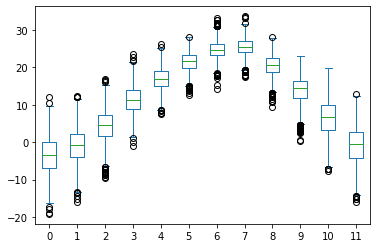

In [137]:
pd.DataFrame(weather_list).T.plot(kind='box')